In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [2]:
%matplotlib notebook

In [3]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [4]:
# Loading in the compressed data
Flattenedfilename = 'Segments1_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments1_compr_flat_filt.npz
Segments1_compr_flat_filt_roughness.jpg
12
2019-08-02/case1.2


In [5]:
# Histogram accumulation
countslist = []
accumlist = [] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .12
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 10
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Z2 ranging from 0 to 0.12
Max number of bins specified is 10
Sturges rule says maxbins = 11
Using nbins =  10
Using levels = 3 for uncertainty analysis


Original =  1512
4 0 378 [128  83  54  38  30  16  11   7   4]
4 1 378 [123  82  58  46  26  17   8   4  11]
4 2 378 [133  68  70  42  18  19   4   6   7]
4 3 378 [133  84  62  31  22  14  13   4   5]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03236721186149535
statsigma =  0.17990889878351027


<IPython.core.display.Javascript object>


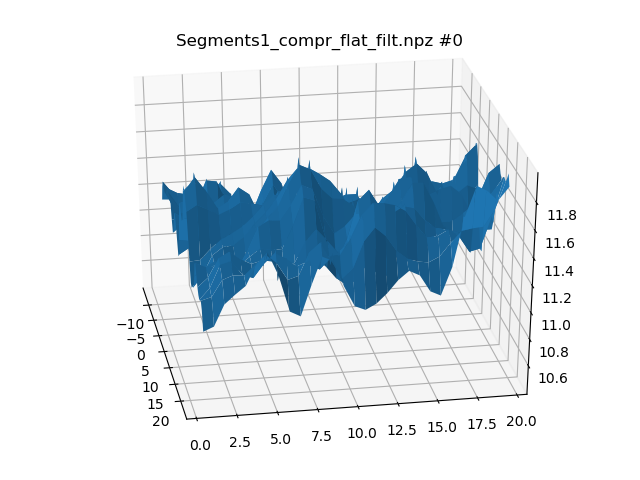

std dev of height =  0.2929112818919347
integral =  0.01088453747467927


<IPython.core.display.Javascript object>


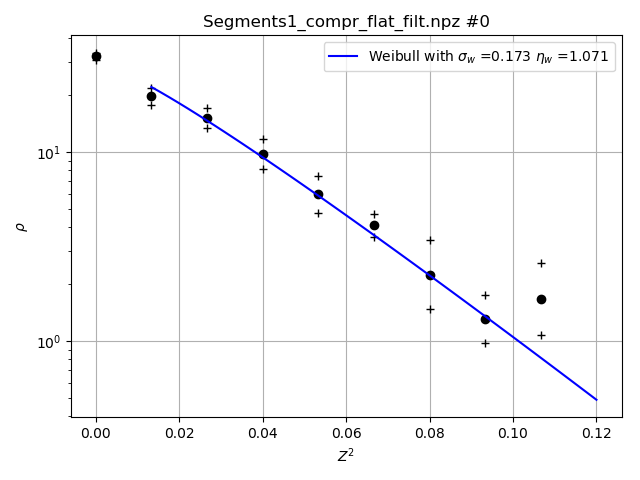

[30.7047345  17.6455099  13.34037331  8.14383521  4.73141306  3.55507352
  1.46627572  0.96965643  1.07964988]
Original =  1512
4 0 378 [110  82  59  38  29  18  13   8   9]
4 1 378 [112  79  53  37  28  18  15   8   7]
4 2 378 [101  86  69  38  26  15  16   7   7]
4 3 378 [114  76  59  36  28  13  11   9  10]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.04014072275876194
statsigma =  0.2003514980197601


<IPython.core.display.Javascript object>


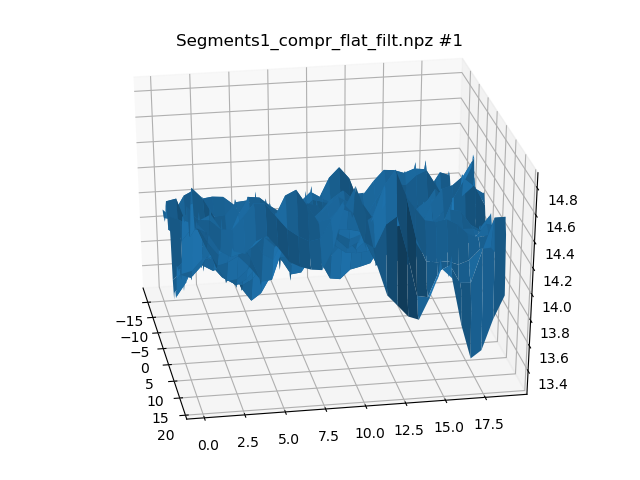

std dev of height =  0.2841190609474345
integral =  0.01116343490304709


<IPython.core.display.Javascript object>


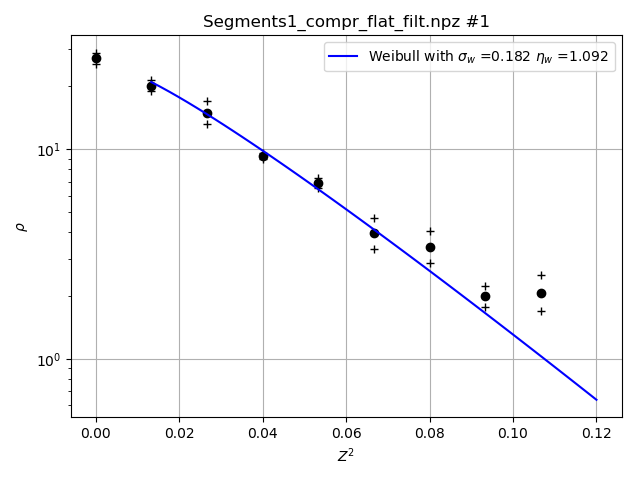

[25.49926286 18.83900102 13.14165175  8.96611636  6.5298821   3.3530761
  2.85784517  1.76815435  1.67993267]
Original =  1512
4 0 378 [131  82  49  41  16  18   9   9   5]
4 1 378 [123  76  59  39  22  19   8  10   4]
4 2 378 [119  80  60  43  22  16  14   7   3]
4 3 378 [119  81  60  39  23  14  17   9   5]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03505640796867395
statsigma =  0.18723356528324175


<IPython.core.display.Javascript object>


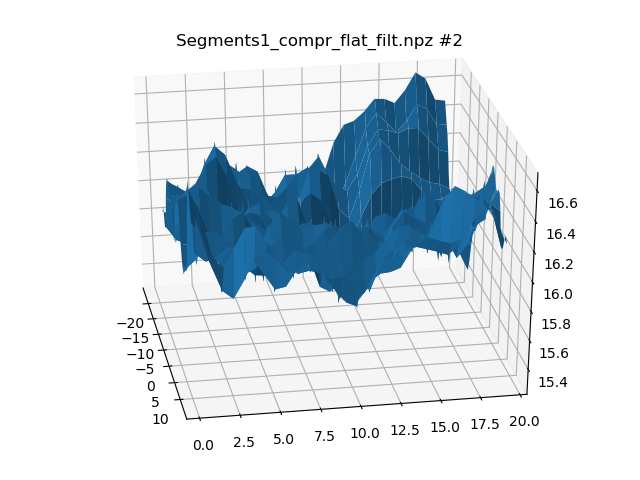

std dev of height =  0.2359612894049176
integral =  0.010994716287617735


<IPython.core.display.Javascript object>


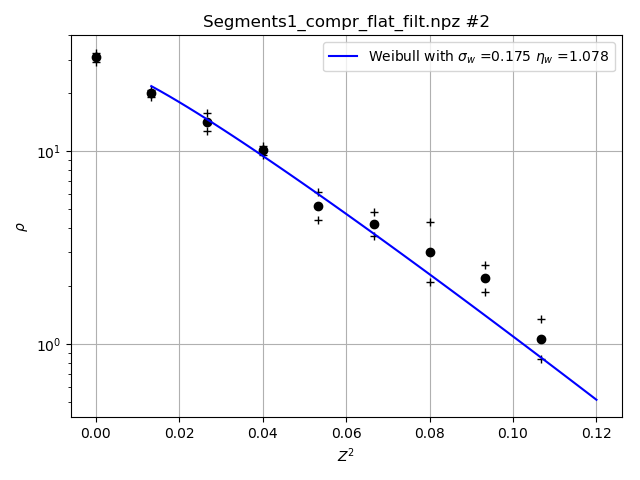

[29.22410089 19.23328417 12.84151172  9.60845263  4.38860724  3.6231242
  2.11134055  1.87050821  0.83850942]
Original =  1512
4 0 378 [145  85  50  36  20   8  13   8   1]
4 1 378 [129  97  56  35  19  15  10   4   3]
4 2 378 [139  96  58  28  16   6  10   6   8]
4 3 378 [139  95  48  32  17   8  14   7   9]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.031233029364891543
statsigma =  0.1767286885734502


<IPython.core.display.Javascript object>


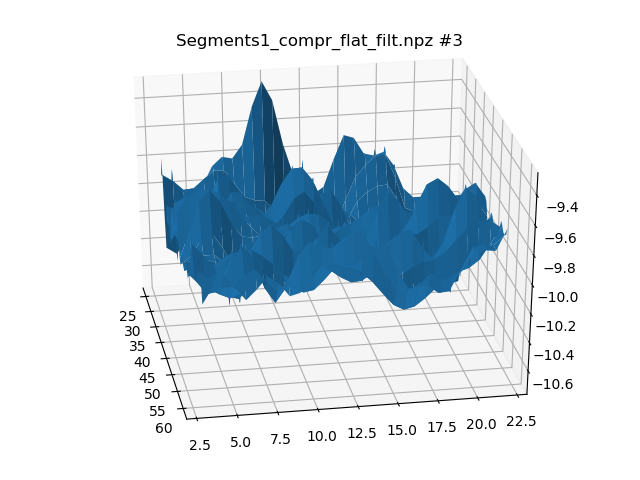

std dev of height =  0.21344139792063074
integral =  0.01073469387755102


<IPython.core.display.Javascript object>


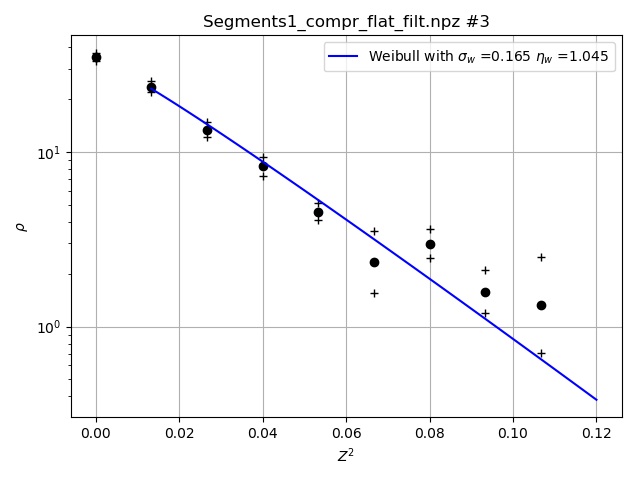

[33.06994559 22.05637229 12.12524906  7.33404467  4.06681798  1.54965556
  2.45963368  1.19252383  0.70620526]
Original =  1512
4 0 378 [129  86  58  31  25  25  11   3   1]
4 1 378 [133  92  58  37  23  10   6   7   2]
4 2 378 [140  86  47  38  16  20  12   7   5]
4 3 378 [129  84  71  30  20  18  11   6   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03065346863548787
statsigma =  0.1750813200643857


<IPython.core.display.Javascript object>


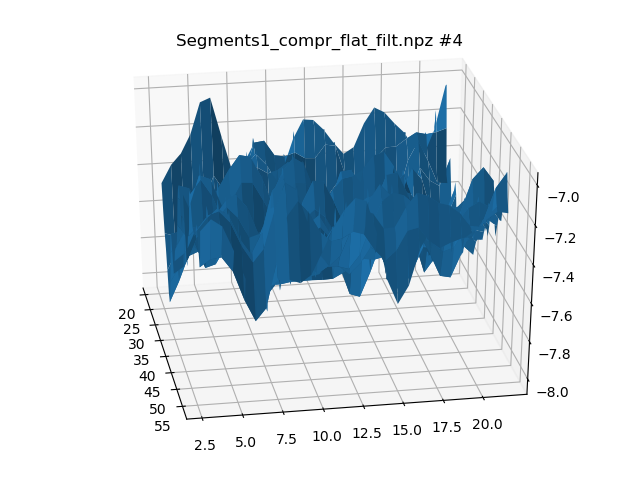

std dev of height =  0.1835464367444952
integral =  0.010889038937654735


<IPython.core.display.Javascript object>


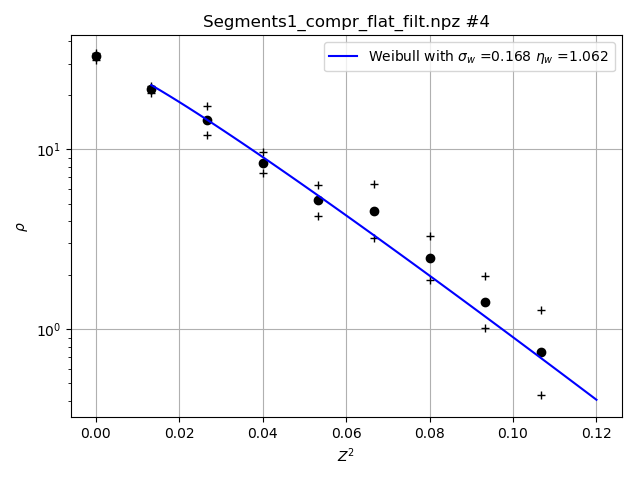

[31.44916766 20.59336581 12.07459182  7.36941654  4.254915    3.20822611
  1.87117188  1.02179307  0.42970918]
Original =  1512
4 0 378 [153  77  58  28  29  14   9   3   0]
4 1 378 [128 102  60  36  19  13   6   6   2]
4 2 378 [148  85  65  28  15  10  12   8   1]
4 3 378 [145  83  60  37  21  10   3   8   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.02813337127235696
statsigma =  0.16773005476764433


<IPython.core.display.Javascript object>


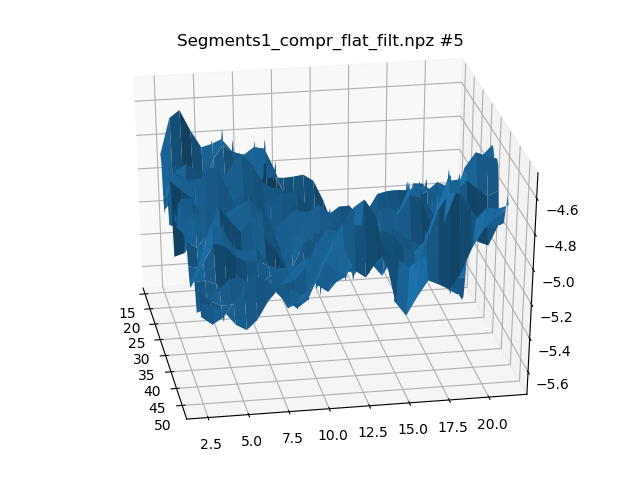

std dev of height =  0.20573925882406158
integral =  0.010726783310901749


<IPython.core.display.Javascript object>


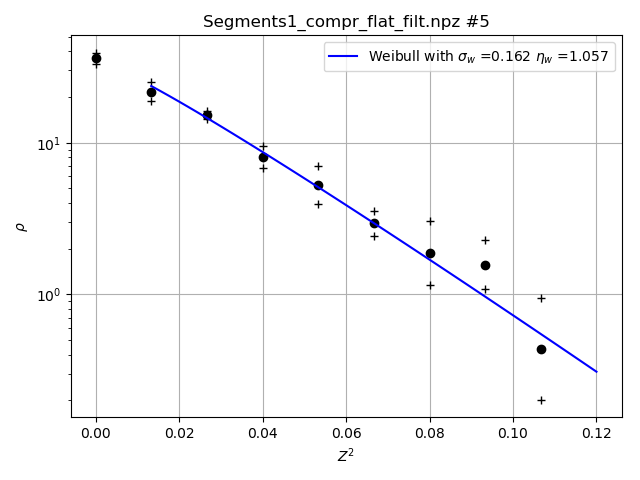

[33.01010529 18.95335926 14.3940622   6.83762449  3.9412612   2.43494476
  1.16116767  1.0782784   0.20206803]
Original =  1512
4 0 378 [131  81  55  38  24  13  11   8   2]
4 1 378 [130  85  50  40  20  20  10   9   7]
4 2 378 [144  71  53  35  24  15  12   7   4]
4 3 378 [122  87  57  39  32  10   9   9   5]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.032831986634725356
statsigma =  0.18119598956578856


<IPython.core.display.Javascript object>


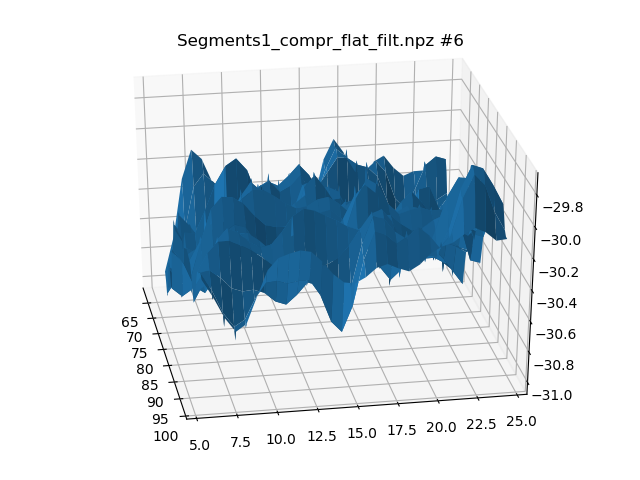

std dev of height =  0.2358521651599113
integral =  0.010859995461765373


<IPython.core.display.Javascript object>


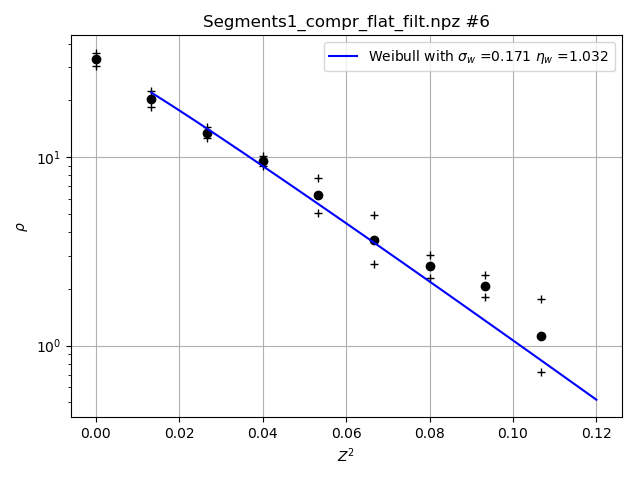

[30.49957345 18.36860804 12.63304423  8.91826657  5.04674399  2.6960415
  2.29363942  1.81526457  0.72505495]
Original =  1512
4 0 378 [124  84  60  39  25   9   7  10   3]
4 1 378 [125  83  63  37  19  12  16  12   3]
4 2 378 [129  86  51  35  15  24   9  10   6]
4 3 378 [126  86  50  35  24  17  12   7   8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.0341029562116389
statsigma =  0.18466985734450247


<IPython.core.display.Javascript object>


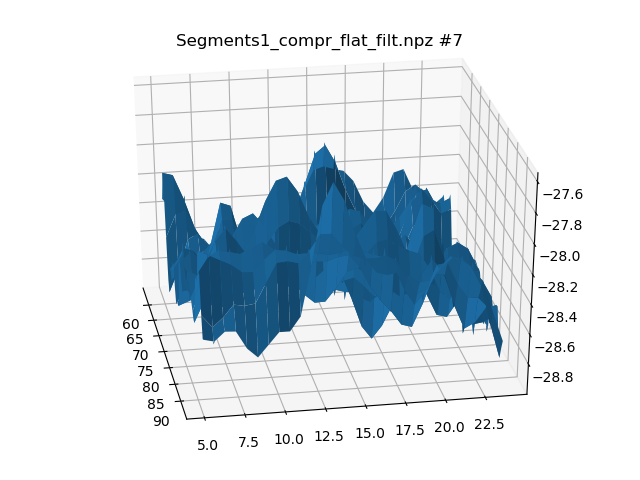

std dev of height =  0.23704479676281423
integral =  0.010942276979237964


<IPython.core.display.Javascript object>


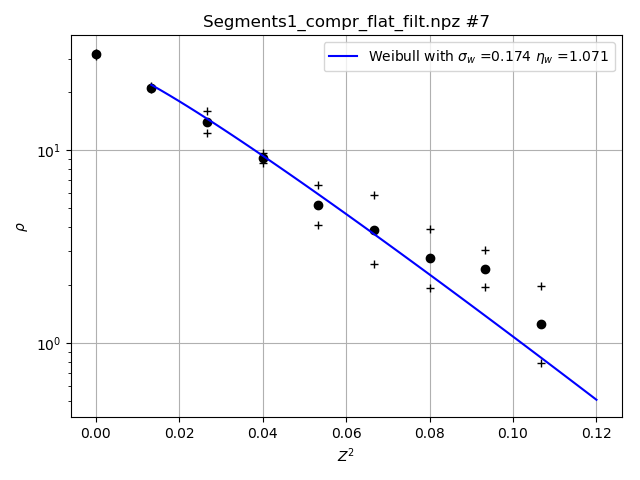

[30.88957245 20.7633576  12.30031207  8.59077798  4.09071739  2.57071721
  1.92741428  1.94508719  0.78732777]
Original =  1512
4 0 378 [129  75  48  40  25  18   8  11   5]
4 1 378 [120  79  58  32  36  16  11   4   7]
4 2 378 [125  80  60  38  23  11   9  10   4]
4 3 378 [117  85  57  29  28  20   9   8   6]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03734938992413404
statsigma =  0.19325990252541791


<IPython.core.display.Javascript object>


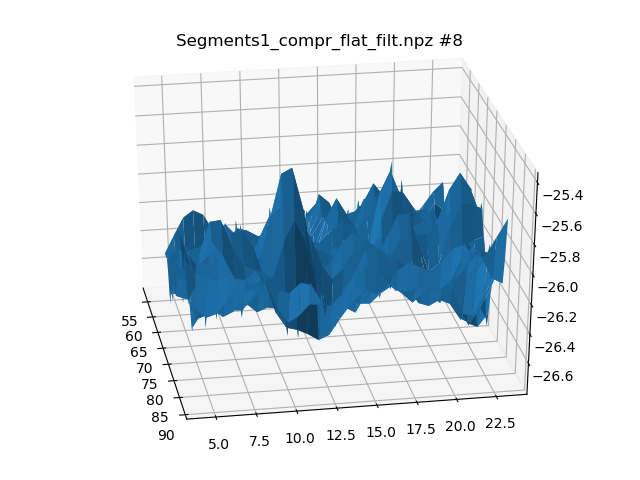

std dev of height =  0.2180938051210555
integral =  0.010959981494332638


<IPython.core.display.Javascript object>


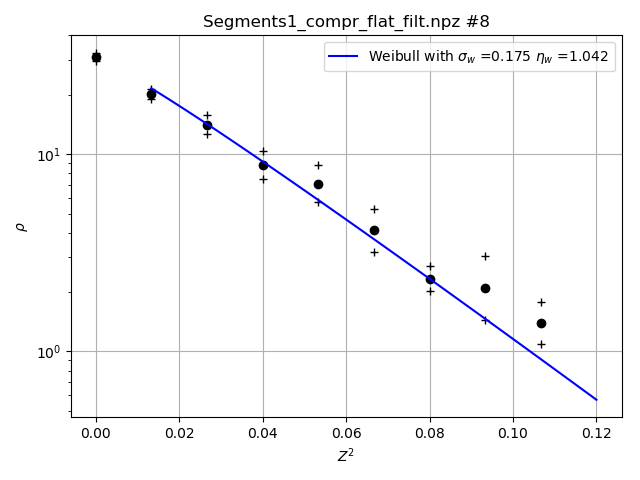

[29.5507497  19.01914197 12.6679074   7.47601721  5.69420998  3.20100336
  2.01347005  1.43991279  1.08641146]
Original =  1512
4 0 378 [137  92  58  34  19   7   6   7   4]
4 1 378 [126  85  62  32  33  13   6   7   6]
4 2 378 [140  90  40  36  26  18   7   9   1]
4 3 378 [128  88  52  33  30  23   8   8   1]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03098306096454522
statsigma =  0.17602005841535567


<IPython.core.display.Javascript object>


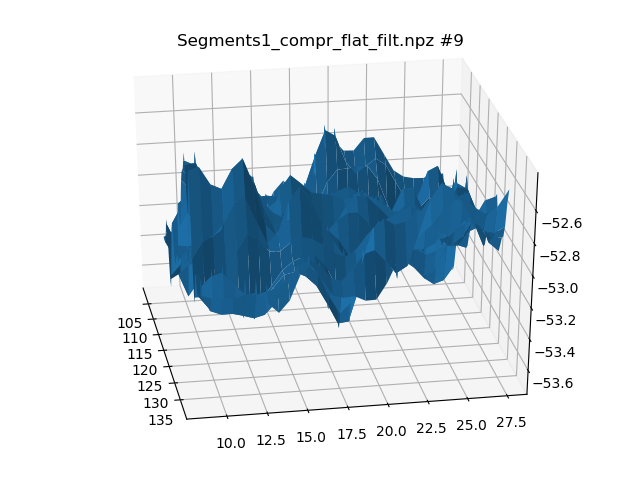

std dev of height =  0.23926859550684385
integral =  0.01087409420289855


<IPython.core.display.Javascript object>


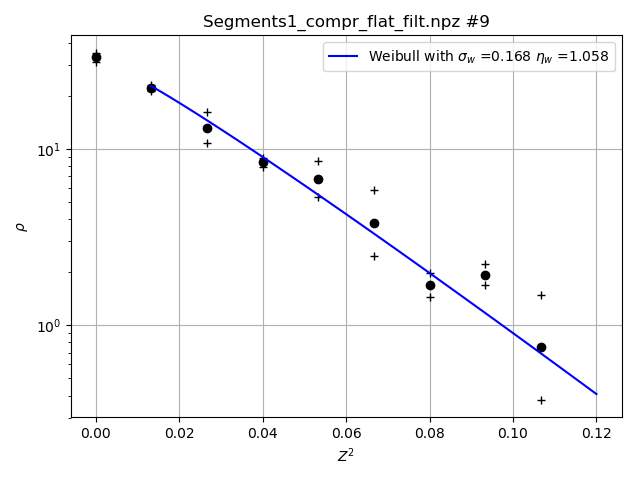

[31.24904513 21.31601798 10.87775958  7.95032153  5.31431222  2.47463884
  1.4410586   1.68624662  0.37832028]
Original =  1512
4 0 378 [127  90  57  44  20  11  12   4   2]
4 1 378 [140  85  48  40  21  14  13   5   5]
4 2 378 [139  94  51  26  23  10  11   8   3]
4 3 378 [134  80  59  37  29  13   9   6   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.030597139336671957
statsigma =  0.17492037999236096


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


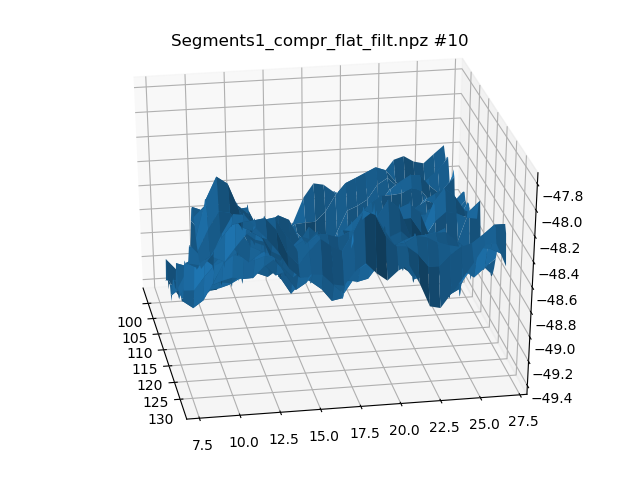

std dev of height =  0.31665841599462285
integral =  0.010833333333333334


<IPython.core.display.Javascript object>


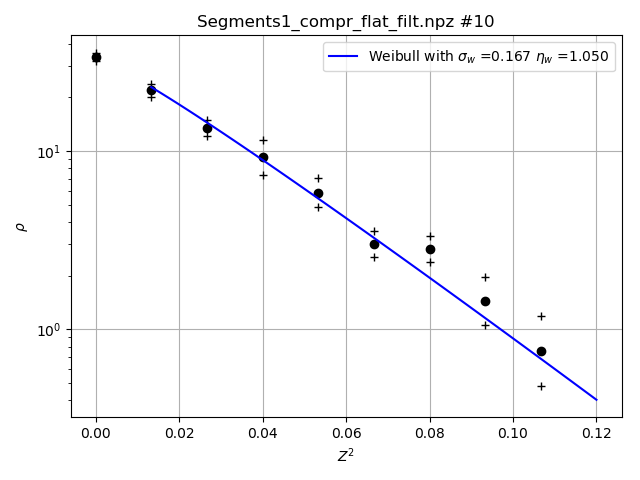

[32.16044228 20.19472459 12.09624014  7.35974811  4.82598317  2.54459113
  2.38637511  1.06280242  0.48030216]
Original =  1512
4 0 378 [139  77  53  47  16  18  10   5   3]
4 1 378 [134  79  68  30  24  16  11   3   3]
4 2 378 [131  79  65  37  22  13   6   7   5]
4 3 378 [129  87  43  41  34  18   8   6   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03147292000609884
statsigma =  0.17740608784959674


<IPython.core.display.Javascript object>


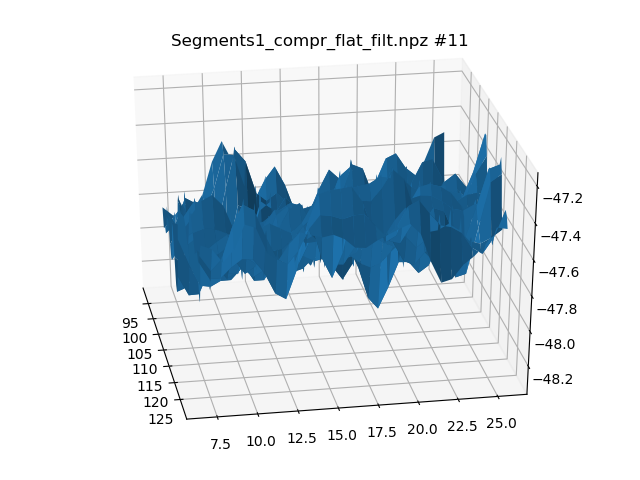

std dev of height =  0.23108682085516286
integral =  0.010852607709750566


<IPython.core.display.Javascript object>


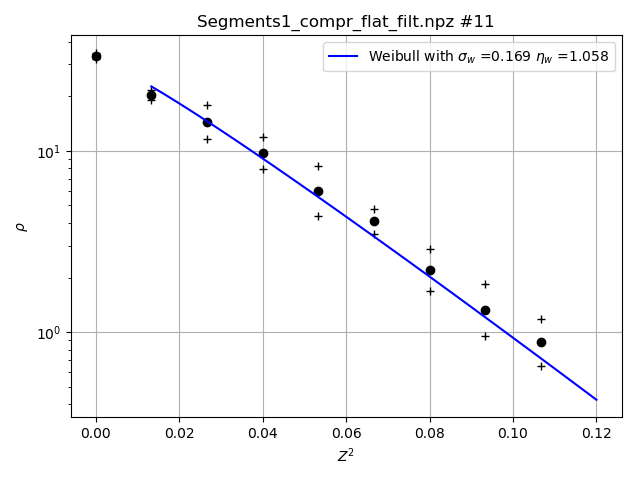

[32.14839665 18.93011519 11.56214211  7.95477153  4.37683717  3.46810129
  1.68158521  0.94626644  0.65319104]


In [6]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  1512
4 0 378 [139  77  53  47  16  18  10   5   3]
4 1 378 [134  79  68  30  24  16  11   3   3]
4 2 378 [131  79  65  37  22  13   6   7   5]
4 3 378 [129  87  43  41  34  18   8   6   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03147292000609884
statsigma =  0.17740608784959674
integral =  0.010852607709750566
eta_W =  1.0575250810208172
sigma_W =  0.1712609725302219


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


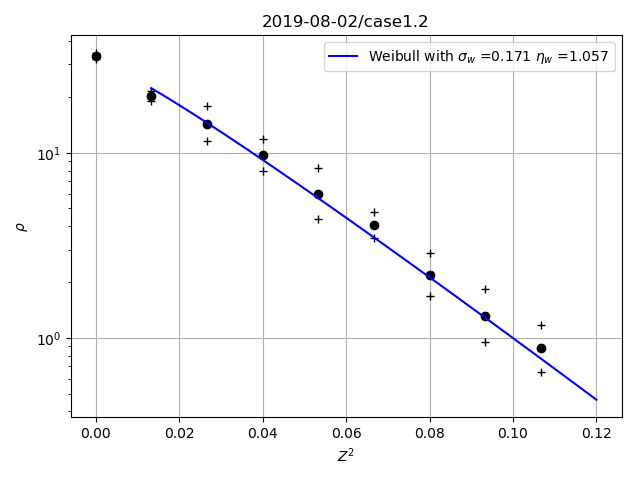

[32.14839665 18.93011519 11.56214211  7.95477153  4.37683717  3.46810129
  1.68158521  0.94626644  0.65319104]


In [7]:
# Sum up the accumulated informaion
# Naccum, Laccum = np.shape(Z2flat_list)
# Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [8]:
plt.savefig(Roughnessfilename)